In [50]:
import pandas as pd
import seaborn as sns

Import da Base de dados

In [51]:
tips = pd.read_csv('./data/tips.csv', sep=',')
tips.head()


,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


C:\Users\barba\anaconda3\envs\tips-analysis\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


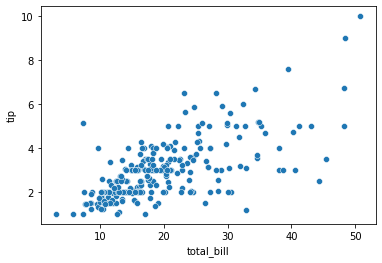

In [52]:
tip_value = sns.scatterplot('total_bill', 'tip', data = tips)

Análisando o Gráfico, o valor da Gorjeta aumenta conforme maior é o valor da conta

In [53]:
print("Total de registros:{}".format(tips.shape[0]))
print("Registros não nulos: {}".format(tips.count()))

Total de registros:244
Registros não nulos: total_bill    244
tip           244
dessert       244
day           244
time          244
size          244
dtype: int64


Criando campo de Porcentagem

In [54]:
tips['percentage'] = tips.tip / tips['total_bill']
tips.head()

,total_bill,tip,dessert,day,time,size,percentage
0,16.99,1.01,No,Sun,Dinner,2,0.059447
1,10.34,1.66,No,Sun,Dinner,3,0.160542
2,21.01,3.50,No,Sun,Dinner,3,0.166587
3,23.68,3.31,No,Sun,Dinner,2,0.139780
4,24.59,3.61,No,Sun,Dinner,4,0.146808


In [55]:
tips['percentage'] = tips.percentage.round(2)
tips.head()

,total_bill,tip,dessert,day,time,size,percentage
0,16.99,1.01,No,Sun,Dinner,2,0.06
1,10.34,1.66,No,Sun,Dinner,3,0.16
2,21.01,3.50,No,Sun,Dinner,3,0.17
3,23.68,3.31,No,Sun,Dinner,2,0.14
4,24.59,3.61,No,Sun,Dinner,4,0.15


Análise pela porcentagem

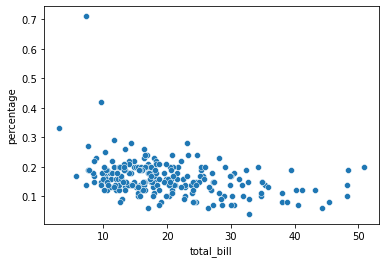

In [56]:
percentage = sns.scatterplot(x = tips.total_bill , y = tips.percentage, data = tips)

Análisando o Gráfico, o valor da Conta não é proporcional ao valor da Gorjeta


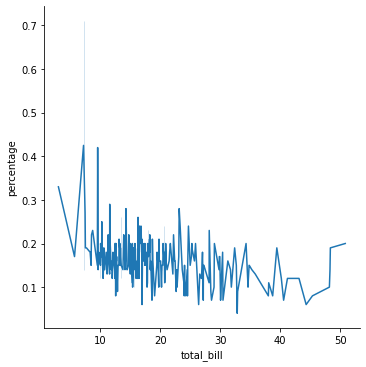

In [57]:
percentage_bill_line = sns.relplot(x = tips.total_bill , y = tips.percentage, data = tips, kind='line')

Análise da Progreção para validação

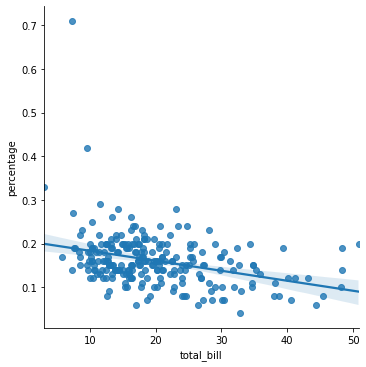

In [58]:
percentage_bill_progression = sns.lmplot(x = 'total_bill' , y = 'percentage', data = tips)

Análise 2 - Sobremesa

In [59]:
tips.head()

,total_bill,tip,dessert,day,time,size,percentage
0,16.99,1.01,No,Sun,Dinner,2,0.06
1,10.34,1.66,No,Sun,Dinner,3,0.16
2,21.01,3.50,No,Sun,Dinner,3,0.17
3,23.68,3.31,No,Sun,Dinner,2,0.14
4,24.59,3.61,No,Sun,Dinner,4,0.15


In [60]:
tips[tips.dessert == 'Yes'].describe()


,total_bill,tip,size,percentage
count,93.000000,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602,0.163226
std,9.832154,1.401468,0.810751,0.085060
min,3.070000,1.000000,1.000000,0.040000
25%,13.420000,2.000000,2.000000,0.110000
50%,17.920000,3.000000,2.000000,0.150000
75%,26.860000,3.680000,3.000000,0.200000
max,50.810000,10.000000,5.000000,0.710000


In [61]:
tips[tips.dessert == 'No'].describe()

,total_bill,tip,size,percentage
count,151.000000,151.000000,151.000000,151.000000
mean,19.188278,2.991854,2.668874,0.159536
std,8.255582,1.377190,1.017984,0.039889
min,7.250000,1.000000,1.000000,0.060000
25%,13.325000,2.000000,2.000000,0.140000
50%,17.590000,2.740000,2.000000,0.160000
75%,22.755000,3.505000,3.000000,0.185000
max,48.330000,9.000000,6.000000,0.290000


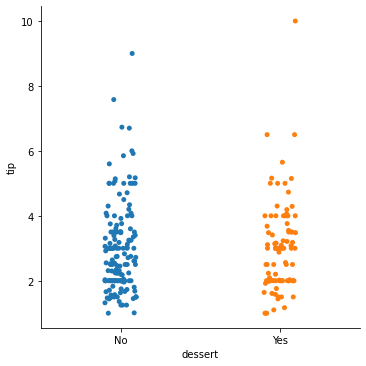

In [62]:
sns.catplot(x='dessert', y='tip', data = tips)

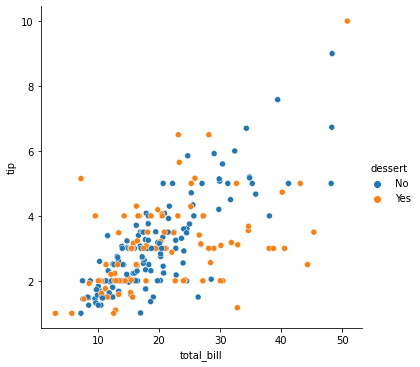

In [63]:
sns.relplot(x='total_bill', y='tip', hue= 'dessert', data=tips)

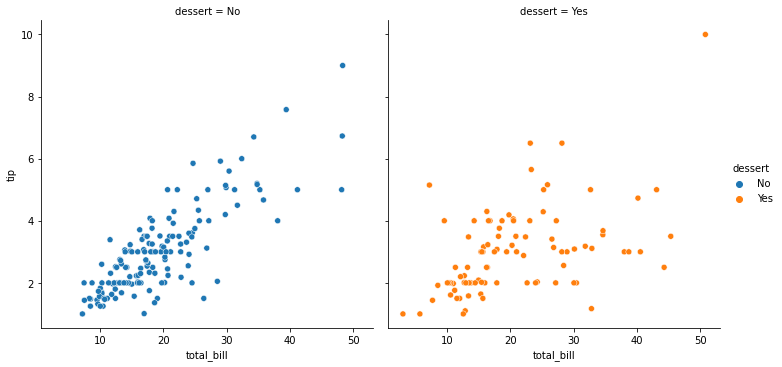

In [64]:
sns.relplot(x='total_bill', y='tip', hue= 'dessert', col='dessert', data=tips)

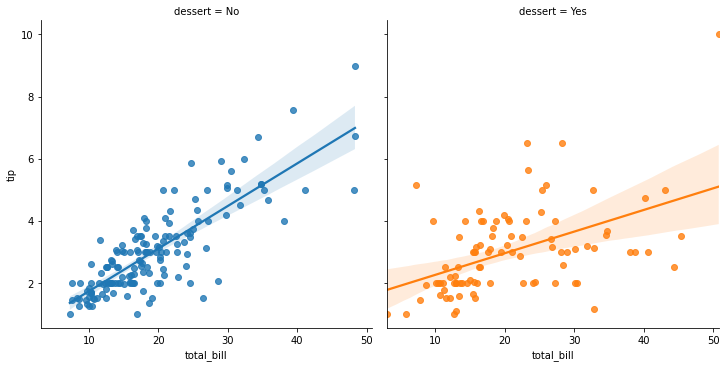

In [65]:
sns.lmplot(x='total_bill', y='tip', hue= 'dessert', col='dessert', data=tips)

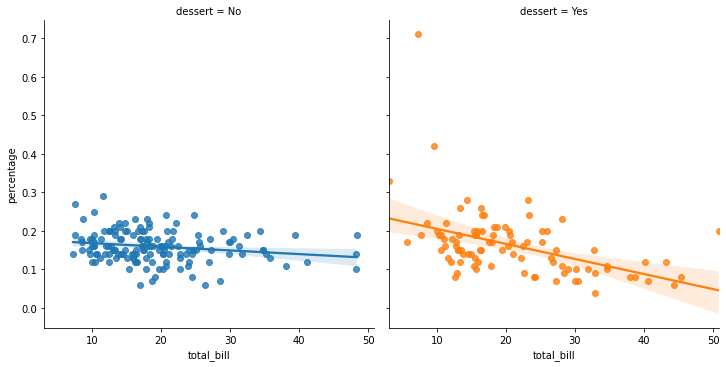

In [66]:
sns.lmplot(x='total_bill', y='percentage', hue= 'dessert', col='dessert', data=tips)

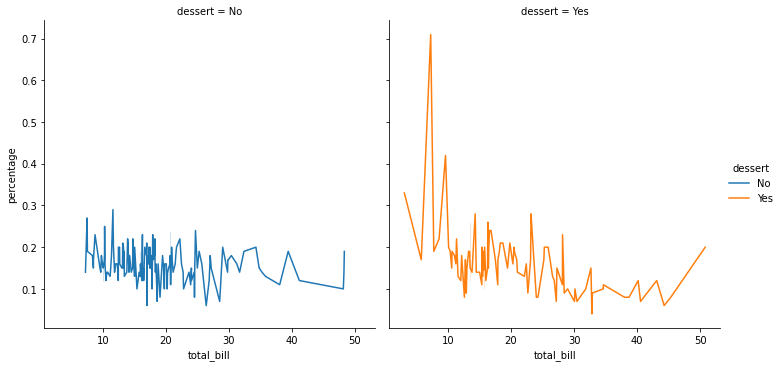

In [67]:
sns.relplot(x='total_bill', y='percentage', hue= 'dessert', col='dessert', data=tips, kind= 'line')

Visualmente, existe uma diferença no valor da gorjeta daqueles que pediram e não pediram sobremesa

**Teste de Hipótese**

**H<sup>null</sup>**

**A distribuição da Gorjeta é a mesma nos dois grupos**

**H<sup>alt</sup>**

**A distribuição da taxa da  Gorjeta não é a mesma nos dois grupos**

In [68]:
from scipy.stats import ranksums

In [69]:
dessert = tips.query("dessert == 'Yes'").percentage
no_dessert = tips.query("dessert == 'No'").percentage
no_dessert

0      0.06
1      0.16
2      0.17
3      0.14
4      0.15
       ... 
235    0.12
238    0.13
239    0.20
242    0.10
243    0.16
Name: percentage, Length: 151, dtype: float64

In [70]:
r = ranksums(dessert, no_dessert)
print("O valor do p-value é {}".format(r.pvalue))

O valor do p-value é 0.5266635660124415


**Hipótese aceita**

**H<sup>null</sup>**

**A distribuição da taxa da  Gorjeta é a mesma nos dois grupos**